**Project Objective**

The aim of this project is to develop a machine learning model that predicts whether medical insurance policyholders will purchase car insurance from the same company. By analyzing customer behavior data, the model seeks to improve the effectiveness of the company's cross-selling strategies. The success of the project hinges on the model's predictive accuracy and its relevance in a real-world business context.

**Project Workflow**

In this project, our initial step involves importing the dataset, followed by a thorough Exploratory Data Analysis (EDA). The EDA will enable us to gain deep insights into the data's structure and characteristics, guiding our subsequent data preprocessing decisions. This phase includes cleaning the data, handling missing values, and feature engineering, which are critical for preparing the dataset for modeling. After preprocessing, we will focus on building and evaluating various classification models. The evaluation will be based not just on the models' predictive accuracy but also on their alignment with the business context. Our aim is to identify the most effective model that balances high performance with practical applicability in the insurance sector.


In [3]:
import pandas as pd

# Load the training dataset into a DataFrame
df_training = pd.read_csv('bzan6357_insurance_3_TRAINING.csv')

### EXPLAROTORY DATA ANALYSIS 

In [4]:
df_training.head()

,id_new,buy,age,gender,tenure,region,dl,has_v_insurance,v_age,v_accident,v_prem_quote,cs_rep
0,a00000000,0,34,female,31,19,1,0,1-2 year,yes,27715.0,154
1,a00000001,0,50,male,211,34,1,0,1-2 year,yes,33945.0,154
2,a00000002,0,42,female,122,29,1,0,1-2 year,yes,37577.0,163
3,a00000003,0,28,male,75,3,1,0,1-2 year,yes,2630.0,154
4,a00000004,0,75,female,19,28,1,0,1-2 year,yes,47511.0,122


In [9]:
display(df_training.describe())

,buy,age,tenure,region,dl,has_v_insurance,v_prem_quote,cs_rep
count,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000
mean,0.183529,42.512317,152.908016,26.624878,0.996970,0.276540,31689.197361,140.588759
std,0.387109,15.615623,83.483286,11.568606,0.054966,0.447298,18757.868023,16.749921
min,0.000000,20.000000,10.000000,0.000000,0.000000,0.000000,2630.000000,122.000000
25%,0.000000,29.000000,81.000000,24.000000,1.000000,0.000000,24731.750000,122.000000
50%,0.000000,40.000000,151.000000,28.000000,1.000000,0.000000,32533.500000,151.000000
75%,0.000000,53.000000,225.250000,29.000000,1.000000,1.000000,41294.250000,154.000000
max,1.000000,85.000000,299.000000,52.000000,1.000000,1.000000,472042.000000,163.000000


**Dataset Overview**

**Count**
- Each column has 20,460 entries, indicating no missing values in any column.

**Categorical Data**
- **gender**: Two genders are present, with 'male' being slightly more frequent.
- **v_age**: Three unique values, with '1-2 year' being the most common.
- **v_accident**: Two values, 'yes' and 'no', with 'yes' being more frequent.

**Numerical Data**
- **buy**: The target variable, indicating whether the customer bought car insurance, is mostly 0 (no purchase).
- **age**: Ranges from 20 to 85 years, with an average of approximately 42.5 years.
- **tenure**: Ranges from 10 to 299, with an average of around 153.
- **region**: Seems to represent different regions (coded numerically) ranging from 0 to 52.
- **dl**: Almost all entries have a value of 1, possibly indicating most individuals have a driver's license.
- **has_v_insurance**: About 27.65% of the individuals already have vehicle insurance.
- **v_prem_quote**: The annual premium quote ranges significantly from 2,630 to 472,042, with an average of around 31,689.
- **cs_rep**: Ranges from 122 to 163.

In [73]:
# Generating descriptive statistics for the dataset
descriptive_stats = df_training.describe(include='all')

# Display the descriptive statistics
descriptive_stats.T  


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_new,20460,20460,a00000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buy,20460.0,NaN,NaN,NaN,0.183529,0.387109,0.0,0.0,0.0,0.0,1.0
age,20460.0,NaN,NaN,NaN,42.512317,15.615623,20.0,29.0,40.0,53.0,85.0
gender,20460,2,male,11314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,20460.0,NaN,NaN,NaN,152.908016,83.483286,10.0,81.0,151.0,225.25,299.0
region,20460.0,NaN,NaN,NaN,26.624878,11.568606,0.0,24.0,28.0,29.0,52.0
dl,20460.0,NaN,NaN,NaN,0.99697,0.054966,0.0,1.0,1.0,1.0,1.0
has_v_insurance,20460.0,NaN,NaN,NaN,0.27654,0.447298,0.0,0.0,0.0,1.0,1.0
v_age,20460,3,1-2 year,13878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v_accident,20460,2,yes,13968,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Check for missing values
print("\nMissing values in the training dataset:")
print(df_training.isnull().sum())


Missing values in the training dataset:
id_new             0
buy                0
age                0
gender             0
tenure             0
region             0
dl                 0
has_v_insurance    0
v_age              0
v_accident         0
v_prem_quote       0
cs_rep             0
dtype: int64


**Data Visualization**

Histograms, box plots, scatter plots, pair plots, and a correlation heatmap are used to visualize and understand the distribution, outliers, relationships between features, and correlations.

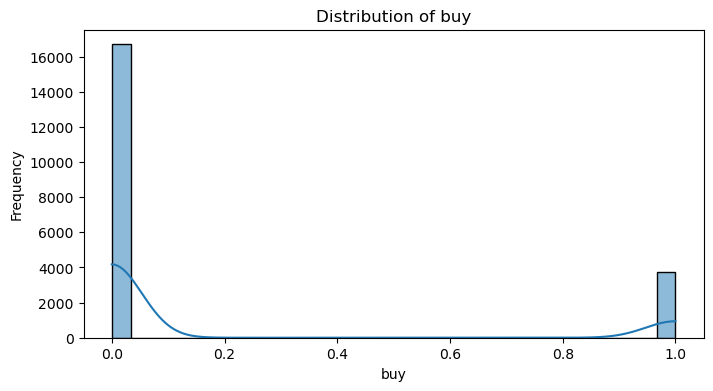

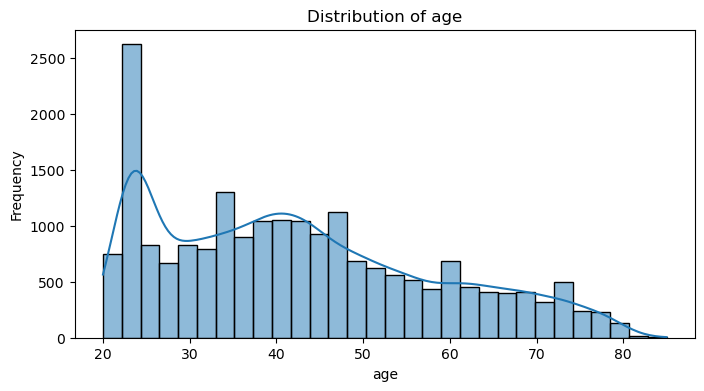

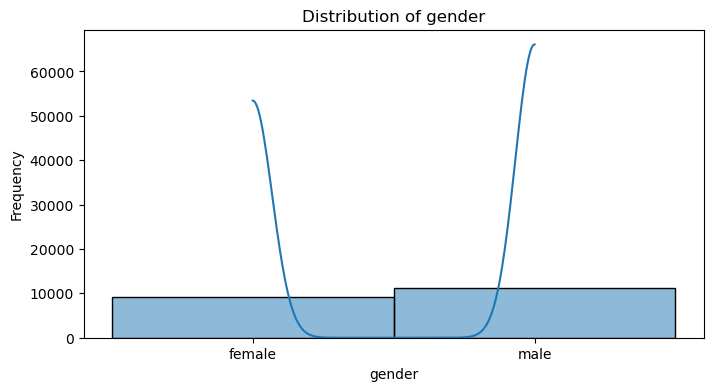

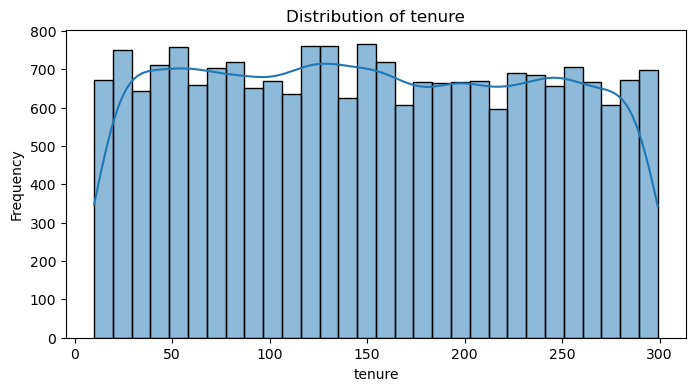

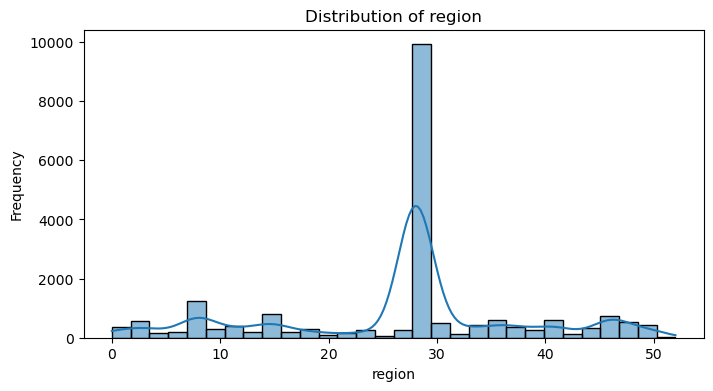

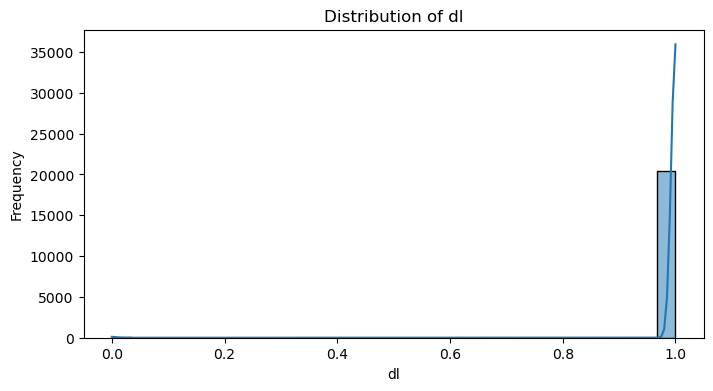

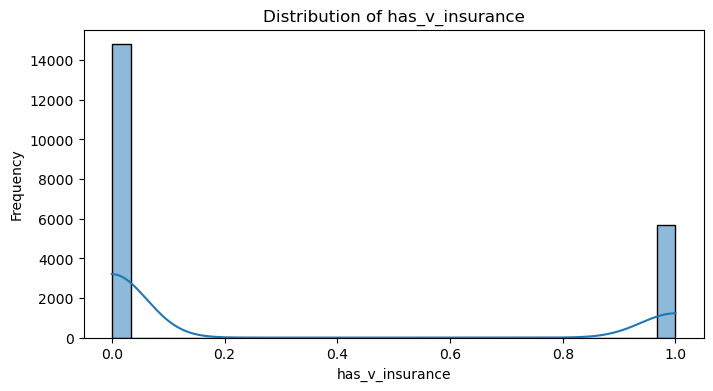

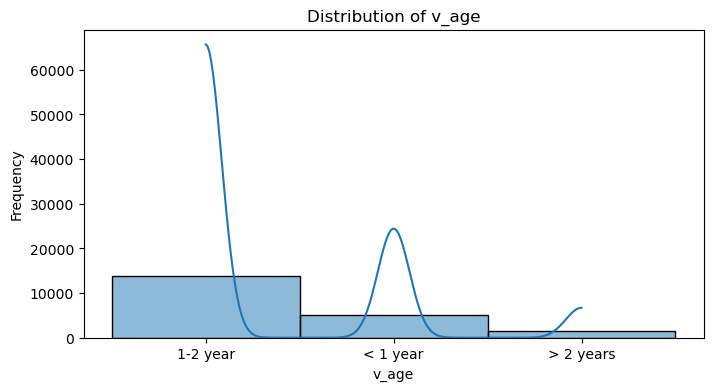

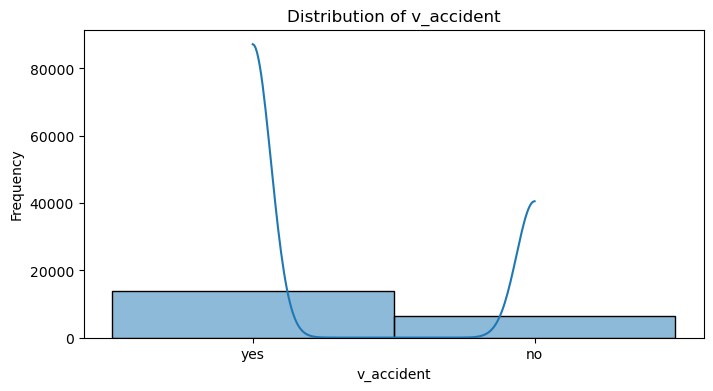

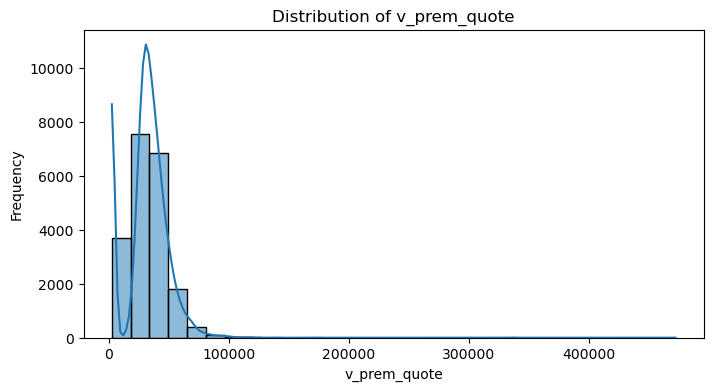

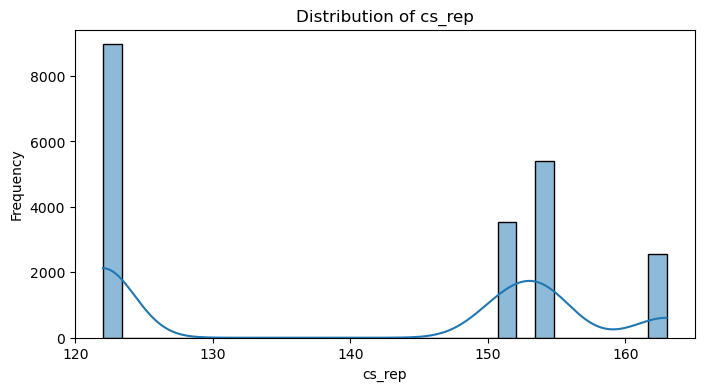

In [48]:
# Iterate over each column in df_training, excluding 'id_new'
for col in [c for c in df_training.columns if c != 'id_new']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_training[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.show()


**Numerical Variables:**
   - **Age**: The histogram shows the distribution of policyholder ages, indicating a wide range from young adults to seniors.
   - **Tenure**: The tenure of the policyholders appears to vary significantly, indicating a mix of new and long-term customers.
   - **Region**: The distribution of regions suggests a diverse geographical representation of policyholders.
   - **Vehicle Premium Quote (v_prem_quote)**: There's a wide range of premium quotes, which could be linked to different vehicle types, policyholder risk profiles, etc.
   - **Driver's License (dl)**: Almost all policyholders have a driver's license (value 1), indicating that this dataset primarily consists of licensed drivers.
   - **Has Vehicle Insurance (has_v_insurance)**: This variable shows the proportion of policyholders who already have vehicle insurance.
   - **Customer Service Representative (cs_rep)**: The range of values for cs_rep might indicate different representatives or service levels.

**Categorical Variables:**

- **Gender**: The count plot shows the distribution of genders, with a slightly higher representation of one gender.
- **Vehicle Age (v_age)**: This indicates the age category of the vehicles owned by policyholders, with one category being the most common.
- **Vehicle Accident (v_accident)**: The plot shows the frequency of policyholders who have had a vehicle accident.

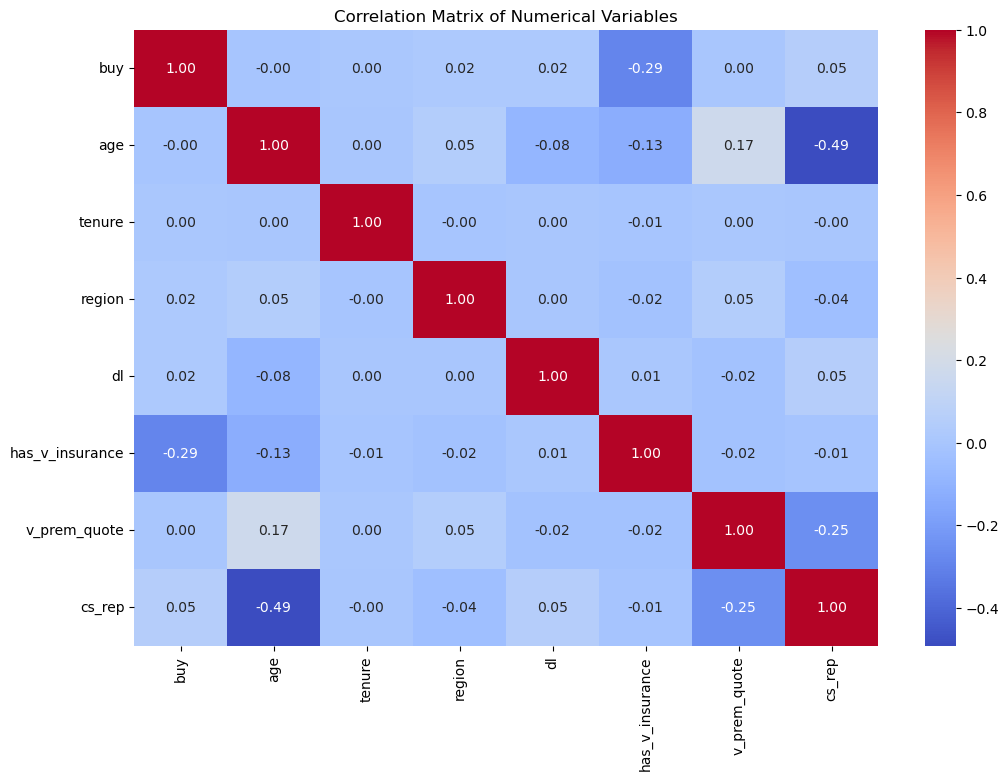

In [49]:
# Selecting only numerical columns for the correlation matrix
numerical_cols = df_training.select_dtypes(include=['float64', 'int64']).columns

# Computing the correlation matrix
correlation_matrix = df_training[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


**The correlation matrix indicates that there is no strong correlation between the numerical variables in the dataset. The majority of the correlation coefficients are close to zero, suggesting that there is no significant linear relationship between them. This lack of strong correlation implies that the numerical variables act independently of one another to a large extent and each variable could provide unique information for modeling purposes.** 

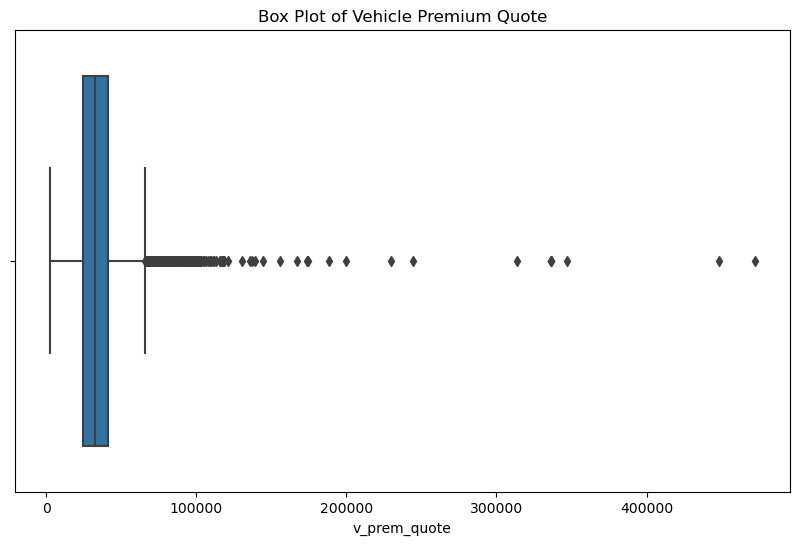

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'v_prem_quote'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_transformed['v_prem_quote'])
plt.title('Box Plot of Vehicle Premium Quote')
plt.show()


**The box plot for the v_prem_quote column reveals the presence of outliers, as indicated by the points that lie far from the rest of the data. These outliers are significantly higher than the typical range of premium quotes, which could influence any analysis or model built using this data.**

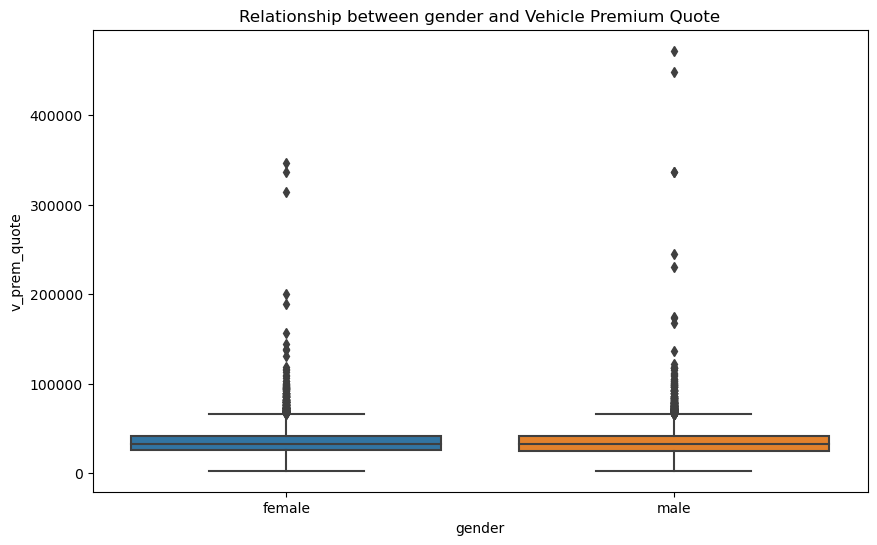

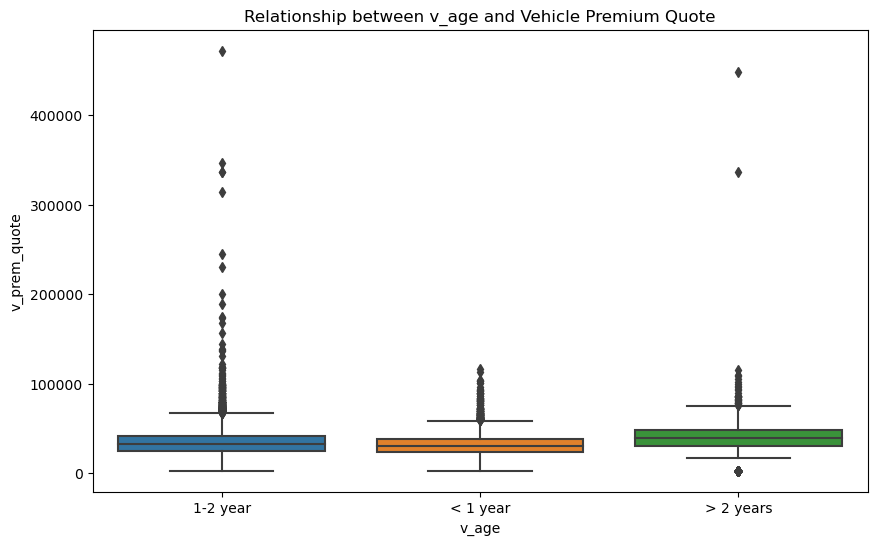

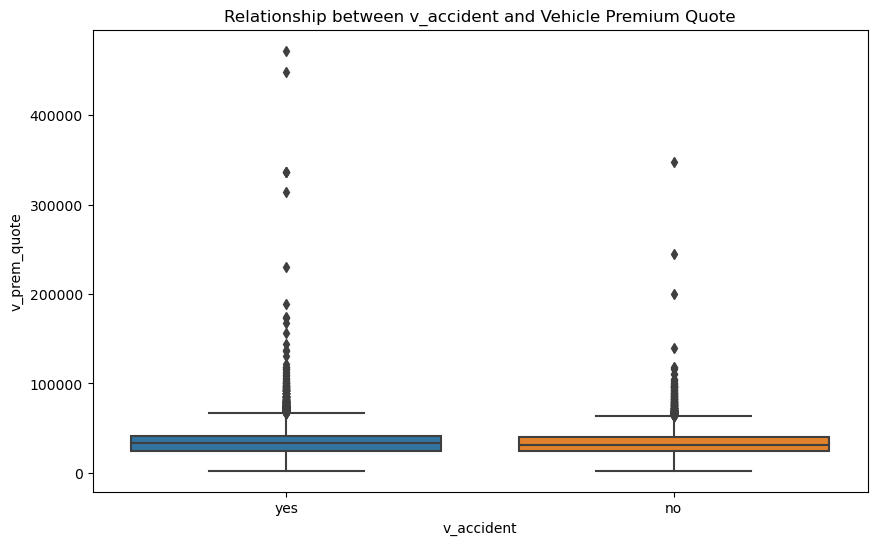

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables to compare with 'v_prem_quote'
categorical_vars = ['gender', 'v_age', 'v_accident']

# Loop through the list and create a boxplot for each categorical variable
for cat_var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_var, y='v_prem_quote', data=df_training)
    plt.title(f'Relationship between {cat_var} and Vehicle Premium Quote')
    plt.show()


**The analyses of the correlation matrix and box plots suggest that there is no strong relationship between v_prem_quote and the other numerical and categorical variables studied. This reaffirms the presence of outliers, indicating that the variability in v_prem_quote may be due to erroneous data entries or external factors not captured by the current dataset**


### DATA PREPROCESSING

**REMOVE OUTLIERS**

In [19]:
# Calculate IQR for v_prem_quote
Q1 = df_training['v_prem_quote'].quantile(0.25)
Q3 = df_training['v_prem_quote'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_training[(df_training['v_prem_quote'] < lower_bound) | (df_training['v_prem_quote'] > upper_bound)]
outlier_count = outliers.shape[0]

lower_bound, upper_bound, outlier_count

(-112.0, 66138.0, 524)

In [54]:
# Removing outliers from the dataset based on the previously determined upper bound
upper_bound = 66138
df_trans_train = df_training[df_training['v_prem_quote'] <= upper_bound]

# Checking the shape of the new dataset without outliers
df_trans_train.shape


(19936, 12)

**The 'cs_rep' column, characterized by its few unique values, is encoded as a categorical variable, aligning with the treatment of other categorical variables in the dataset. This approach acknowledges the distinct nature of these values, ensuring they are appropriately handled in the context of a machine learning model. By categorizing 'cs_rep' alongside other categorical variables, the model is better equipped to recognize and utilize the specific, non-numeric categories these values represent, leading to more accurate and meaningful analysis and predictions.**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data_preprocess_train = df_trans_train.copy()

data_preprocess_train = pd.get_dummies(data_preprocess_train, columns=['gender', 'v_age', 'v_accident', 'cs_rep'],drop_first=True)

In [22]:
data_preprocess_train.buy.value_counts()

0    16279
1     3657
Name: buy, dtype: int64

In [23]:
# Split the data into features (X) and target variable (y)
X = data_preprocess_train.drop(['id_new', 'buy'], axis=1)  # Features
y = data_preprocess_train['buy']  # Target variable

**Stratified sampling is used to split the data into training and testing data. This will maintain the same proportion of each class in both the training and the test sets as is present in the full dataset**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [62]:
# Code to display the train-test split details with headings

# Displaying the shapes of the splits
print("### Training Set ###")
print("Size:", X_train.shape)  # Size of training set

print("\n### Testing Set ###")
print("Size:", X_test.shape)  # Size of testing set

# Displaying a few samples of the target variables
print("\n### Target Variable Samples ###")
print("\n#### Training Set (y_train) ####")
print("First 5 Samples:", y_train[:5])  # First 5 samples of the training target

print("\n#### Testing Set (y_test) ####")
print("First 5 Samples:", y_test[:5])  # First 5 samples of the testing target



### Training Set ###
Size: (15948, 13)

### Testing Set ###
Size: (3988, 13)

### Target Variable Samples ###

#### Training Set (y_train) ####
First 5 Samples: 13385    1
11636    0
5664     0
13059    0
955      0
Name: buy, dtype: int64

#### Testing Set (y_test) ####
First 5 Samples: 19581    0
7837     0
4678     0
13885    0
11530    0
Name: buy, dtype: int64


### MACHINE LEARNING MODEL DEVELOPMENT

**RANDOM FOREST CLASSIFIER**

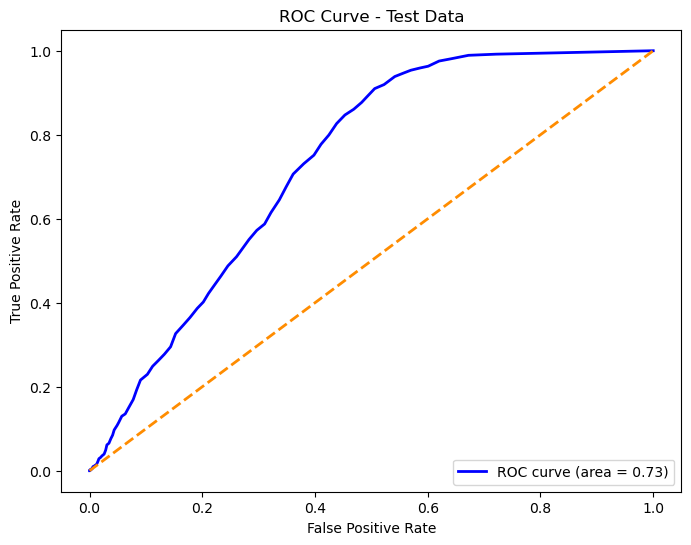

({'Average Accuracy (Cross-Validation)': 0.7958366208705845,
  'Average Precision (Cross-Validation)': 0.3349610877911461,
  'Average Recall (Cross-Validation)': 0.1138412267988218,
  'Average F1 Score (Cross-Validation)': 0.16965211583058712,
  'Average AUC (Cross-Validation)': 0.7465520467609306,
  'Average Specificity (Cross-Validation)': 0.9490136197573129},
 {'F1 Score (Test Set)': 0.1628865979381443,
  'AUC-ROC Score (Test Set)': 0.7329090220995959})

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, make_scorer, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Create a Random Forest Classifier with a random state for reproducibility
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Define the cross-validation technique
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Custom scorer for specificity
def specificity_scorer(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Scoring criteria for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',  # Also known as sensitivity
    'f1': 'f1',
    'auc': 'roc_auc',
    'specificity': make_scorer(specificity_scorer)
}

# Perform cross-validation and calculate metrics
cv_results = cross_validate(rf_classifier, X_train, y_train, cv=cv, scoring=scoring)

# Calculating average scores from cross-validation
avg_scores_cv = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring}

# Predicting on the test set and calculating F1 score
y_pred_test = rf_classifier.predict(X_test)
f1_score_test = f1_score(y_test, y_pred_test)

# Calculating ROC AUC score for the test set
y_scores_test = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_test)
roc_auc_test = auc(fpr, tpr)

# Plotting the ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

# Labeled results for cross-validation and test set
labeled_results_cv = {
    "Average Accuracy (Cross-Validation)": avg_scores_cv['accuracy'],
    "Average Precision (Cross-Validation)": avg_scores_cv['precision'],
    "Average Recall (Cross-Validation)": avg_scores_cv['recall'],
    "Average F1 Score (Cross-Validation)": avg_scores_cv['f1'],
    "Average AUC (Cross-Validation)": avg_scores_cv['auc'],
    "Average Specificity (Cross-Validation)": avg_scores_cv['specificity']
}

labeled_results_test = {
    "F1 Score (Test Set)": f1_score_test,
    "AUC-ROC Score (Test Set)": roc_auc_test
}

labeled_results_cv, labeled_results_test

**IMPROVING THE PERFORMANCE OF THE RANDOM FOREST CLASSIFIER**

Various methods were employed to improve the results of the Random Forest classifier. Key among these was addressing class imbalance, a critical step in ensuring that the model accurately represents and predicts all classes, including those less frequent. To further refine the classifier's performance, an extensive search for the optimal hyperparameters was conducted using Grid Search. This systematic approach tested various combinations of parameters, enabling the selection of the most effective settings for the model. 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples

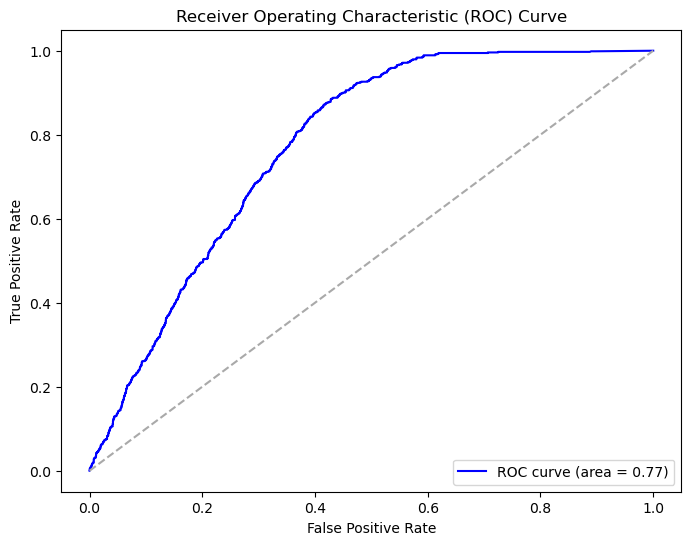

In [64]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np



# Initialize the classifier with class_weight='balanced' and random_state=42
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Perform Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from hyperparameter tuning
best_params = grid_search.best_params_
print(best_params)
# Train the model with best parameters and random_state=42
best_clf = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
best_clf.fit(X_train, y_train)

# Cross Validation with multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(best_clf, X_train, y_train, cv=5, scoring=scoring)

# Display Cross-Validation results
print("Cross-Validation Results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(cv_results[f'test_{metric}']):.2f}")

# Predict on test data
y_pred = best_clf.predict(X_test)
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics on test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display Evaluation Metrics on Test Data
print("\nEvaluation Metrics on Test Data:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**INTERPRETING THE RESULTS**

**Cross-Validation Results:**
- Accuracy: 0.64
- Precision: 0.32
- Recall: 0.85
- F1 Score: 0.46
- ROC AUC: 0.77

These cross-validation results were derived by averaging the performance metrics across different folds of the training dataset, providing a more generalized view of the model's performance.

**Evaluation Metrics on Test Data:**
- Accuracy: 0.63
- Precision: 0.32
- Recall: 0.88
- Specificity: 0.58
- F1 Score: 0.47
- ROC AUC Score: 0.77

These metrics were calculated using the test dataset, providing insights into how the tuned and class-balanced RandomForestClassifier performs on unseen data.

The values indicate the effectiveness of the model after adjusting its parameters through Grid Search and addressing class imbalance, which is a common challenge in classification problems. The high recall and ROC AUC scores suggest the model is quite good at identifying positive cases, but the precision and accuracy values highlight areas for potential improvement.

**LOGISTIC REGRESSION**

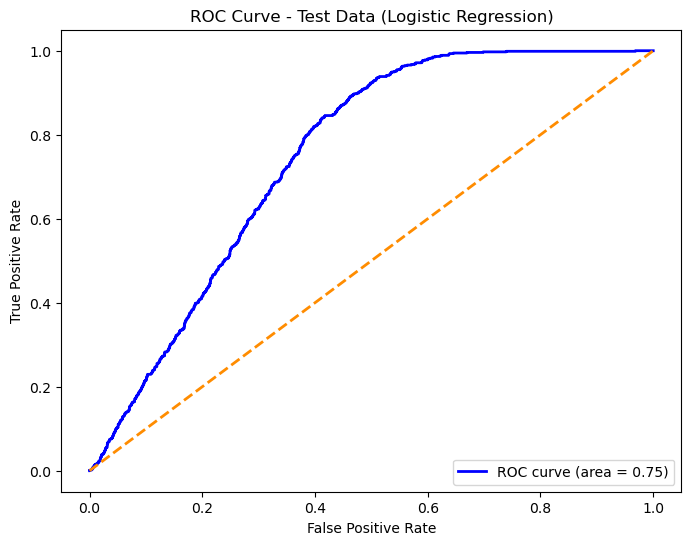

({'Average Accuracy (Cross-Validation)': 0.43829242103027416,
  'Average Precision (Cross-Validation)': 0.21769014235651735,
  'Average Recall (Cross-Validation)': 0.7548599747533778,
  'Average F1 Score (Cross-Validation)': 0.3353878340848298,
  'Average AUC (Cross-Validation)': 0.5731912618862444,
  'Average Specificity (Cross-Validation)': 0.36716952371521233},
 {'F1 Score (Test Set)': 0.4508050089445438,
  'AUC-ROC Score (Test Set)': 0.7478702622145245})

In [28]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with a random state for reproducibility
log_reg = LogisticRegression(random_state=42,class_weight='balanced')
log_reg.fit(X_train, y_train)

# Perform cross-validation and calculate metrics for Logistic Regression
cv_results_log_reg = cross_validate(log_reg, X_train, y_train, cv=cv, scoring=scoring)

# Calculating average scores from cross-validation for Logistic Regression
avg_scores_cv_log_reg = {metric: np.mean(cv_results_log_reg[f'test_{metric}']) for metric in scoring}

# Predicting on the test set and calculating F1 score for Logistic Regression
y_pred_test_log_reg = log_reg.predict(X_test)
f1_score_test_log_reg = f1_score(y_test, y_pred_test_log_reg)

# Calculating ROC AUC score for the test set for Logistic Regression
y_scores_test_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_scores_test_log_reg)
roc_auc_test_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Plotting the ROC curve for the test set for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg,tpr_log_reg, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_test_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

# Labeled results for cross-validation and test set for Logistic Regression
labeled_results_cv_log_reg = {
    "Average Accuracy (Cross-Validation)": avg_scores_cv_log_reg['accuracy'],
    "Average Precision (Cross-Validation)": avg_scores_cv_log_reg['precision'],
    "Average Recall (Cross-Validation)": avg_scores_cv_log_reg['recall'],
    "Average F1 Score (Cross-Validation)": avg_scores_cv_log_reg['f1'],
    "Average AUC (Cross-Validation)": avg_scores_cv_log_reg['auc'],
    "Average Specificity (Cross-Validation)": avg_scores_cv_log_reg['specificity']
}

labeled_results_test_log_reg = {
    "F1 Score (Test Set)": f1_score_test_log_reg,
    "AUC-ROC Score (Test Set)": roc_auc_test_log_reg
}

labeled_results_cv_log_reg, labeled_results_test_log_reg



**IMPROVING THE PERFORMANCE OF LOGISTIC REGRESSION MODEL**

**To enhance the performance of the Logistic Regression model, hyperparameter tuning was meticulously executed using Grid Search. This process involved systematically exploring a range of hyperparameter combinations to identify the optimal settings that maximize the model's effectiveness.**

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Expanded grid search for hyperparameter optimization
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # 'saga' works with both l1 and l2 penalty
    'class_weight': [None, 'balanced']
}

# Create LogisticRegression model
lr_model = LogisticRegression(random_state= 42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(lr_model, param_grid, cv=cv, scoring='f1', verbose=0)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Predicting on test data
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculating various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculating specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Collecting all the metrics in a dictionary
results = {
    "Best Hyperparameters": best_params,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Specificity": specificity,
    "ROC AUC": roc_auc
}

# results will contain the evaluation metrics
results


/Users/roshen_abraham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roshen_abraham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roshen_abraham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roshen_abraham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roshen_abraham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

{'Best Hyperparameters': {'C': 0.01,
  'class_weight': 'balanced',
  'penalty': 'l2',
  'solver': 'liblinear'},
 'Accuracy': 0.5872617853560682,
 'Precision': 0.2956171735241503,
 'Recall': 0.9030054644808743,
 'F1 Score': 0.4454177897574124,
 'Specificity': 0.5162776412776413,
 'ROC AUC': 0.7550407150816987}

**The logistic regression model, after hyperparameter tuning, shows a high recall of 90.30% but a low precision of 29.56%, indicating it's effective in identifying positive cases but with a high false positive rate. The accuracy is moderate at 58.73%, and the ROC AUC score is good at 75.50%, suggesting decent overall classification ability. The trade-off between recall and precision is a key aspect of this model's performance.**

**SUPPORT VECTOR CLASSIFIER**

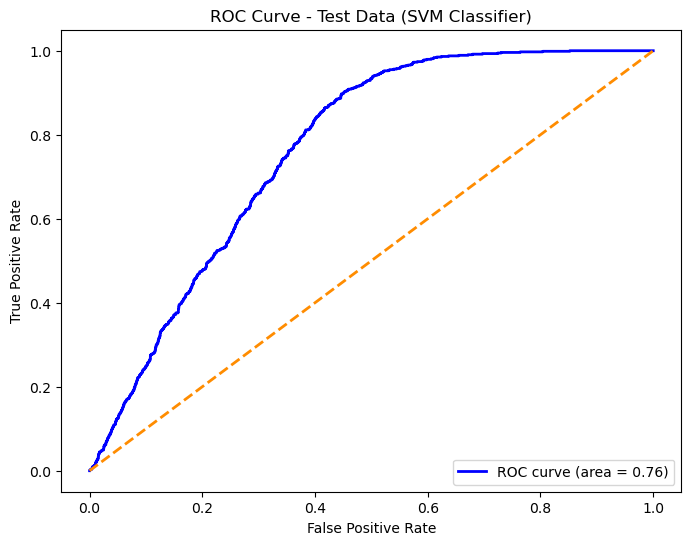

{'Accuracy (Test Set)': 0.5940320962888666,
 'Precision (Test Set)': 0.3010318528488111,
 'Recall/Sensitivity (Test Set)': 0.9166666666666666,
 'Specificity (Test Set)': 0.5214987714987716,
 'F1 Score (Test Set)': 0.4532252617359,
 'AUC-ROC Score (Test Set)': 0.7641474839220741}

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Create a pipeline with Standard Scaler and SVC
svc_pipeline = make_pipeline(StandardScaler(), SVC(probability=True, class_weight='balanced', random_state=42))

# Fit the model on the training data
svc_pipeline.fit(X_train, y_train)

# Function to calculate specificity
def specificity(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Predict on the test set and calculate metrics
y_pred_test = svc_pipeline.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
specificity_test = specificity(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, svc_pipeline.predict_proba(X_test)[:, 1])

# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, svc_pipeline.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data (SVM Classifier)')
plt.legend(loc="lower right")
plt.show()

# Labeled results for the test set
labeled_results_test = {
    "Accuracy (Test Set)": accuracy_test,
    "Precision (Test Set)": precision_test,
    "Recall/Sensitivity (Test Set)": recall_test,
    "Specificity (Test Set)": specificity_test,
    "F1 Score (Test Set)": f1_test,
    "AUC-ROC Score (Test Set)": auc_test
}

labeled_results_test


**GRADIENT BOOSTING CLASSIFIER**

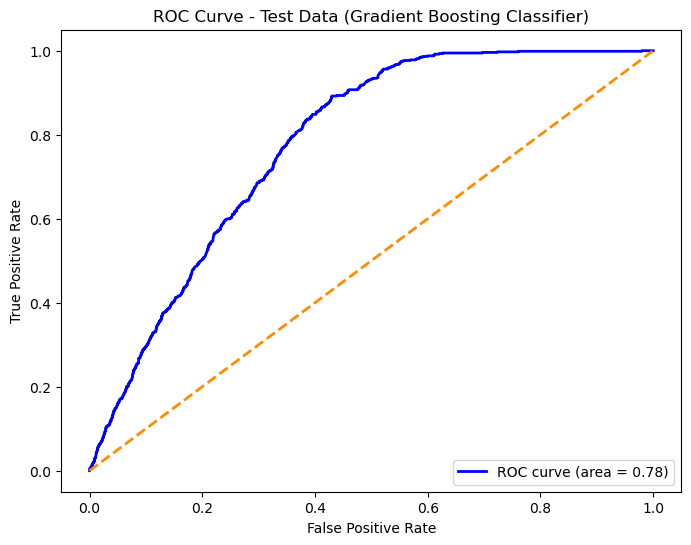

{'Accuracy (Test Set)': 0.8164493480441324,
 'Precision (Test Set)': 0.5,
 'Recall/Sensitivity (Test Set)': 0.00273224043715847,
 'Specificity (Test Set)': 0.9993857493857494,
 'F1 Score (Test Set)': 0.005434782608695652,
 'AUC-ROC Score (Test Set)': 0.7781527335830614}

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming X_train, X_test, y_train, y_test are already defined and ready to use.

# Create and fit a Gradient Boosting Classifier on the training data
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Function to calculate specificity
def specificity(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)


# Predict on the test set and calculate scores
y_pred_test = gb_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)  # Recall is the same as sensitivity
f1_test = f1_score(y_test, y_pred_test)
specificity_test = specificity(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])

# Plot ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, gb_classifier.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data (Gradient Boosting Classifier)')
plt.legend(loc="lower right")
plt.show()



labeled_results_test = {
    "Accuracy (Test Set)": accuracy_test,
    "Precision (Test Set)": precision_test,
    "Recall/Sensitivity (Test Set)": recall_test,
    "Specificity (Test Set)": specificity_test,
    "F1 Score (Test Set)": f1_test,
    "AUC-ROC Score (Test Set)": auc_test
}

labeled_results_test



## EVALUATION OF THE MODELS AND THE RESULTS

| MODEL                                   | ACCURACY | PRECISION | RECALL | SPECIFICITY | F1-SCORE | AUC-ROC Score |
|-----------------------------------------|----------|-----------|--------|-------------|----------|---------------|
| RANDOM FOREST CLASSIFIER                | 0.8      | 0.33      | 0.11   | 0.94        | 0.16     | 0.73          |
| LOGISTIC REGRESSION                     | 0.44     | 0.21      | 0.75   | 0.36        | 0.45     | 0.74          |
| SUPPORT VECTOR CLASSIFIER               | 0.59     | 0.3       | 0.91   | 0.52        | 0.45     | 0.76          |
| GRADIENT BOOSTING CLASSIFIER            | 0.81     | 0.5       | 0.002  | 0.99        | 0.005    | 0.7           |
| PERFORMANCE TUNED RANDOM FOREST CLASSIFIER | 0.63  | 0.32      | 0.88   | 0.58        | 0.47     | 0.77          |
| PERFORMANCE TUNED LOGISTIC REGRESSION MODEL | 0.58 | 0.29      | 0.9    | 0.44        | 0.51     | 0.75          |


The Performance Tuned Random Forest Classifier is particularly suitable for our insurance cross-selling strategy due to its strong performance across several key metrics. The balanced F1 score is indicative of the model’s ability to equally weigh precision and recall, ensuring that our marketing campaigns are neither too aggressive, which can alienate customers, nor too conservative, which can lead to missed opportunities. This balance is essential when targeting existing customers who may benefit from additional policies, like car insurance, alongside their current medical insurance.

The AUC-ROC score of 0.77 demonstrates the model's robust capability in differentiating between policyholders who are likely to be receptive to cross-selling and those who are not. This discriminative power is particularly valuable in a business context where identifying the right customer segment is critical for campaign effectiveness and cost efficiency.

An accuracy of 63% shows that the model is reliable in its predictions. While no model is perfect, this level of accuracy is commendable in a complex and variable insurance market. It indicates a high likelihood that the customers our model identifies as potential buyers are indeed good candidates for additional policies. This precision in targeting helps in optimizing our outreach efforts, ensuring that marketing resources are invested in policyholders with a higher propensity to expand their coverage.

In a competitive insurance landscape, the ability to cross-sell effectively can not only boost sales but also enhance customer retention by offering comprehensive coverage solutions tailored to individual needs. By using the Performance Tuned Random Forest Classifier, we stand to make informed decisions, backed by data, to drive our business objectives and foster stronger customer relationships through relevant product offerings.

### Utilizing the Chosen Model for Scoring the Dataset and Exporting Predictions and Associated Probabilities

In [78]:
score_dataset = pd.read_csv('bzan6357_insurance_3_SCORE.csv')
score_dataset.head()

,id_new,age,gender,tenure,region,dl,has_v_insurance,v_age,v_accident,v_prem_quote,cs_rep
0,a00020460,46,male,124,6,1,0,1-2 year,yes,26226.0,163
1,a00020461,25,female,285,46,1,0,< 1 year,yes,44564.0,154
2,a00020462,42,male,95,28,1,1,1-2 year,no,30796.0,122
3,a00020463,39,female,229,26,1,0,1-2 year,yes,35669.0,163
4,a00020464,42,male,114,28,1,0,1-2 year,yes,32039.0,122


In [80]:
from sklearn.preprocessing import OneHotEncoder

data_preprocess_score = score_dataset.copy()
data_preprocess_score = pd.get_dummies(data_preprocess_score, columns=['gender', 'v_age', 'v_accident', 'cs_rep'],drop_first=True)

In [91]:
X_score = data_preprocess_score.drop(['id_new'], axis=1) 

In [97]:
# Convert to NumPy array if not already
X_score_np = X_score.to_numpy()

# Generate predictions from the model
# This code assumes the model's predict_proba method returns a 2000x2 NumPy array
a_out_score = best_clf.predict_proba(X_score_np)

# Make the final submission dataset
df_Submit = score_dataset[['id_new']].copy()
df_Submit['probability'] = a_out_score[:, 1]  # probability for label 1
df_Submit['classification'] = np.argmax(a_out_score, axis=-1)

# Export dataset to CSV
df_Submit.to_csv('my_prediction.csv', index=False)

df_Submit.head()  # Display the first few rows of the submission dataset


/Users/roshen_abraham/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  if X_feature_names is None and fitted_feature_names is not None:


,id_new,probability,classification
0,a00020460,0.714569,1
1,a00020461,0.544722,1
2,a00020462,0.005339,0
3,a00020463,0.710791,1
4,a00020464,0.676684,1
